# Lights, Camera, Earnings: What Drives Show Biz?


Team members: Achinthya Sreedhar, Atishay Jain, Divyam Rana, Neha Shastri, Wenlin Zhao, Xingzhu Chen

# Introduction

## Problem Definition 

The project aims to identify key factors contributing to the success of movies and TV series on the IMDb platform, focusing on aspects that drive audience satisfaction and box office performance. With a rapidly growing entertainment industry, understanding patterns in ratings, revenue, genre popularity, release timing, and other elements is critical for decision-making by stakeholders, producers, and marketers. By examining extensive data from IMDb, this project seeks to provide actionable insights that can guide content creation, marketing strategies, and release planning to maximize both audience engagement and profitability.

**Objectives**

- Analyze Genre Popularity and Ratings: Determine which genres and genre combinations are most frequently produced and most highly rated, identifying trends in audience preferences for diverse or specific genre content.

- Examine Release Timing and Revenue Peaks: Uncover patterns in high-grossing movie releases across months and seasons, providing insights for optimal release timing to capitalize on peak audience periods.

- Assess Revenue Patterns by Region and Production: Explore the top-performing movies and production companies by revenue, highlighting regional preferences and identifying high-grossing production companies for potential partnership and investment considerations.

- Investigate Audience Ratings and Voting Trends: Analyze common rating ranges and voting patterns to understand how ratings impact popularity, with a focus on identifying genres and specific titles with high engagement and audience satisfaction.

- Examine Runtime Preferences Across Regions and Genres: Identify runtime trends, preferred ranges, and regional differences, allowing stakeholders to optimize film lengths based on audience expectations.

- Provide Strategic Recommendations: Based on the findings, develop evidence-based recommendations to inform stakeholders and production house strategies in terms of genre focus, release schedules, marketing alignment, and runtime optimization.

## Business Significance and Motivation

The project focuses on exploring what drives audience satisfaction and box office success. By identifying top-performing genres, high-rated movies, and seasonality trends in high-grossing releases, stakeholders in the entertainment industry get access to actionable data that enables them to align and schedule their investment, production, releases, and marketing strategies to maximize audience appeal and profitability.
For instance, identifying the most common release months for top-grossing movies offers production houses actionable data on when to release new content to maximize impact. Additionally, exploring the relationship between factors such as movie runtime, genre, revenue, and popularity, can help stakeholders make informed decisions on the types of stories and formats to pursue based on commercial aspirations and audience preferences such as languages, and regions.

## Data source and Entity-Relationship Diagram


- IMDb Non-Commercial Datasets (https://datasets.imdbws.com/)
- Movie Box Office Revenue Prediction (https://data.mendeley.com/datasets/xv9wtc9gdk/2)

<!-- | Table name       | No. rows   | No. columns | Data type         | Description                                                                 |
|------------------|------------|-------------|-------------------|-----------------------------------------------------------------------------|
| name.basics      | 3,586,804  | 6           | Integer           | Information about people in the entertainment industry                      |
| title.akas       | 4,219,099  | 8           | Object, Integer   | Alternative titles for titles in different regions and languages            |
| title.basics     | 305,314    | 9           | Object, Float     | Information about titles, including type, primary title, release year, and genre |
| title.crew       | 6,733,524  | 3           | Object           | Lists the directors and writers associated with specific titles             |
| title.episode    | 7,844,602  | 4           | Object           | Describes the relationship between TV series and their episodes             |
| title.principals | 58,929,801 | 6           | Object           | Details the individuals and their roles involved in the TV industry         |
| title.ratings    | 1,366,239  | 3           | Object, Integer, Float | Ratings and vote counts for titles                                     | -->





| Table Name            | No. Rows   | No. Columns | Data Types                        | Description                                                                     |
|-----------------------|------------|-------------|-----------------------------------|---------------------------------------------------------------------------------|
| imdb_5000_movies      | 4,803      | 20          | Integer, Float, String, DateTime  | Information about movie details including language, title, genres, and budget  |
| imdb_title_basics     | 11,211,953 | 9           | String                            | Describes the title type, title, and runtime in minutes                        |
| imdb_title_episode    | 8,608,344  | 4           | String                            | Information about the season and episode numbers                               |
| imdb_title_ratings    | 1,494,604  | 3           | String, Float, Integer            | Information about the average ratings and number of votes                      |


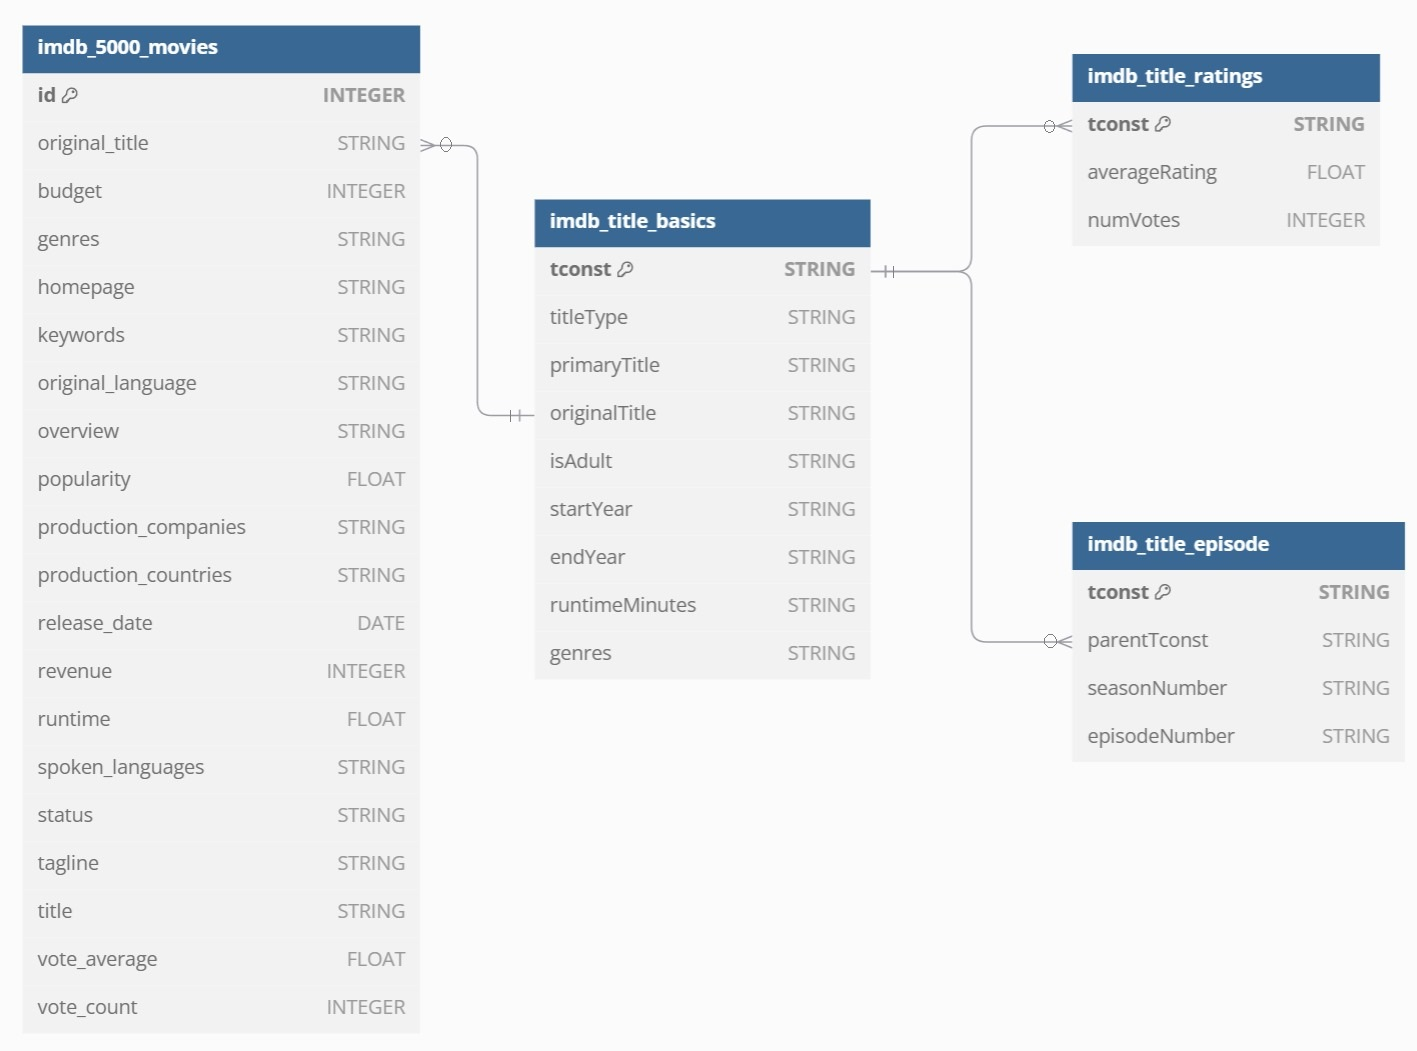

In [24]:
from IPython.display import display, Image

with open("Untitled.jpg", "rb") as file:
    encoded_image = file.read()

# Display the embedded image
display(Image(data=encoded_image, format='jpg'))


## Executive Summary 

This project provides an in-depth analysis of the IMDB dataset, offering valuable insights into audience preferences, genre performance, and box office revenue trends. Key findings reveal that Comedy, Drama, and Documentary are the most frequently produced genres, while Action, Adventure, and Animation films tend to receive higher ratings and better audience engagement. High-grossing movies are often released in June and December, capitalizing on summer and holiday seasons. Region-specific preferences also emerge, with Telugu films showing high ratings and films like Pirates of the Caribbean performing exceptionally well in the Caribbean.

Based on these insights, it is recommended that stakeholders focus on producing films within high-rating genres, schedule major releases during peak months, and tailor content to regional preferences. Additionally, investing in branding and cultivating audience loyalty, as seen with major studios like Marvel, can drive consistent revenue.

Looking ahead, future steps include exploring the impact of streaming services on movie revenue, analyzing the relationship between budget and box office success, and further understanding the evolving dynamics of audience behavior across various platforms to adapt production and distribution strategies.

# Tableau Dashboard

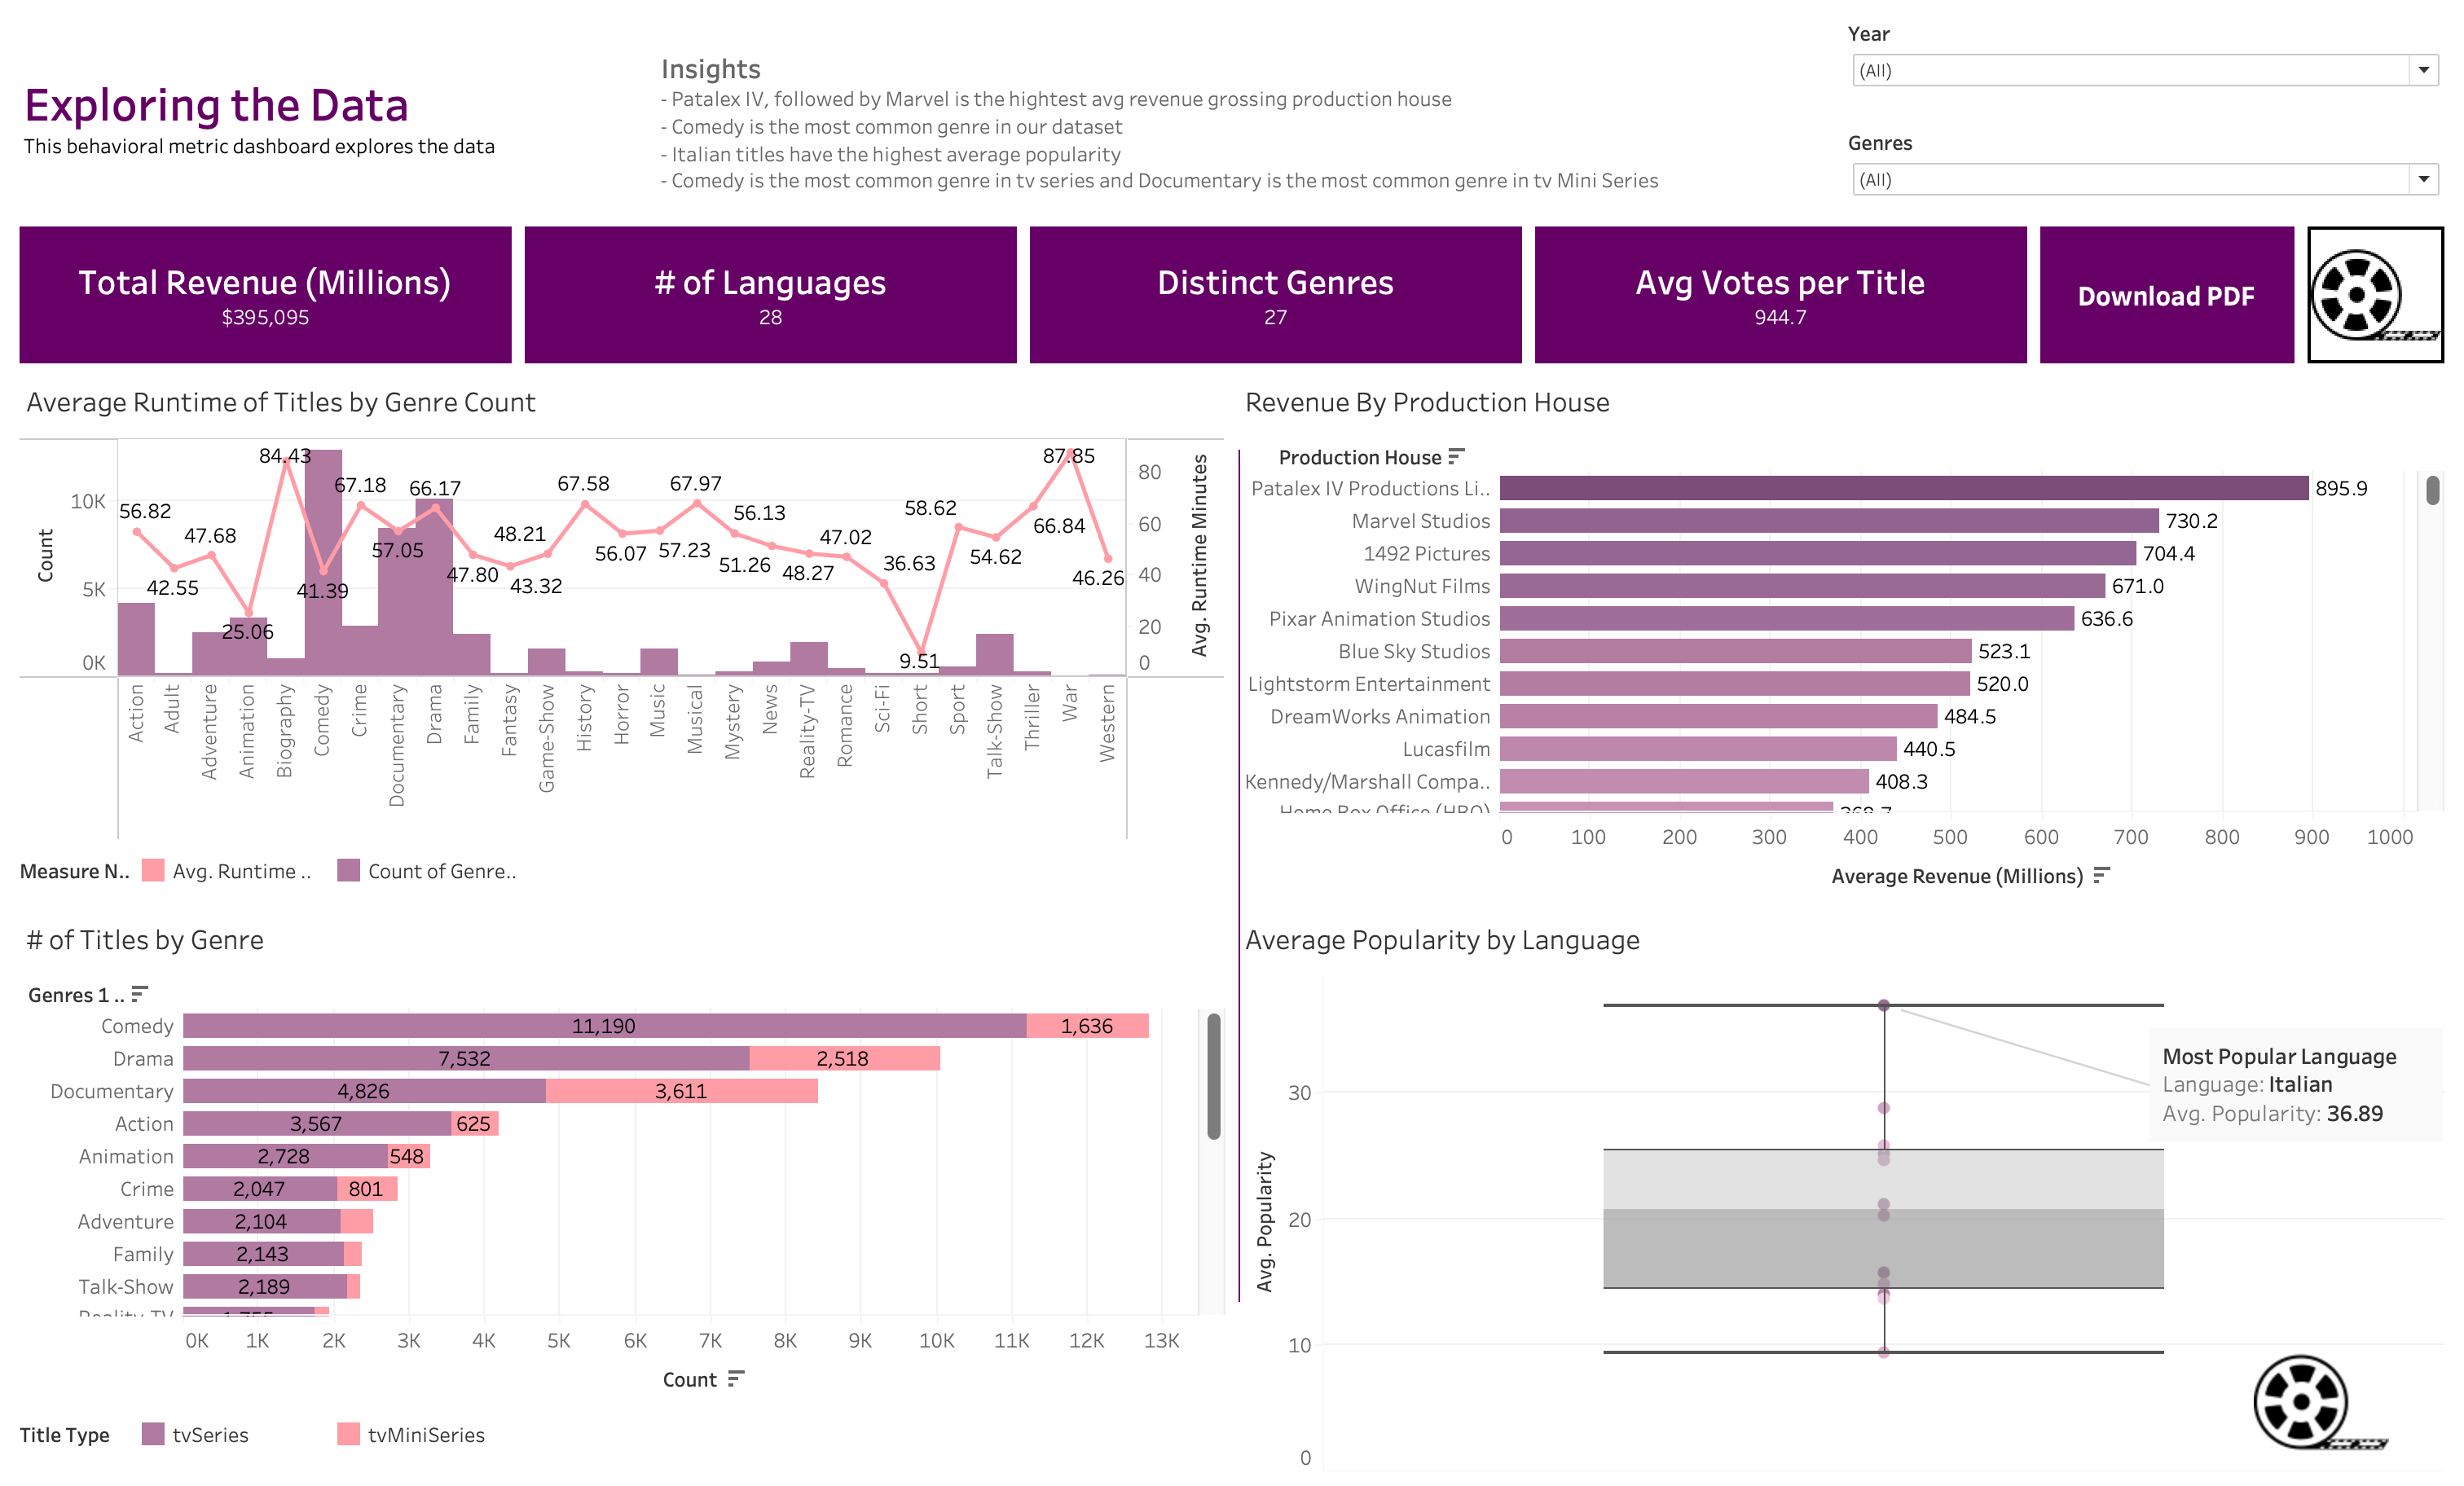

In [25]:
with open("Screenshot 2024-12-03 at 9.26.18 PM.png", "rb") as file:
    encoded_image = file.read()

# Display the embedded image
display(Image(data=encoded_image, format='jpg'))

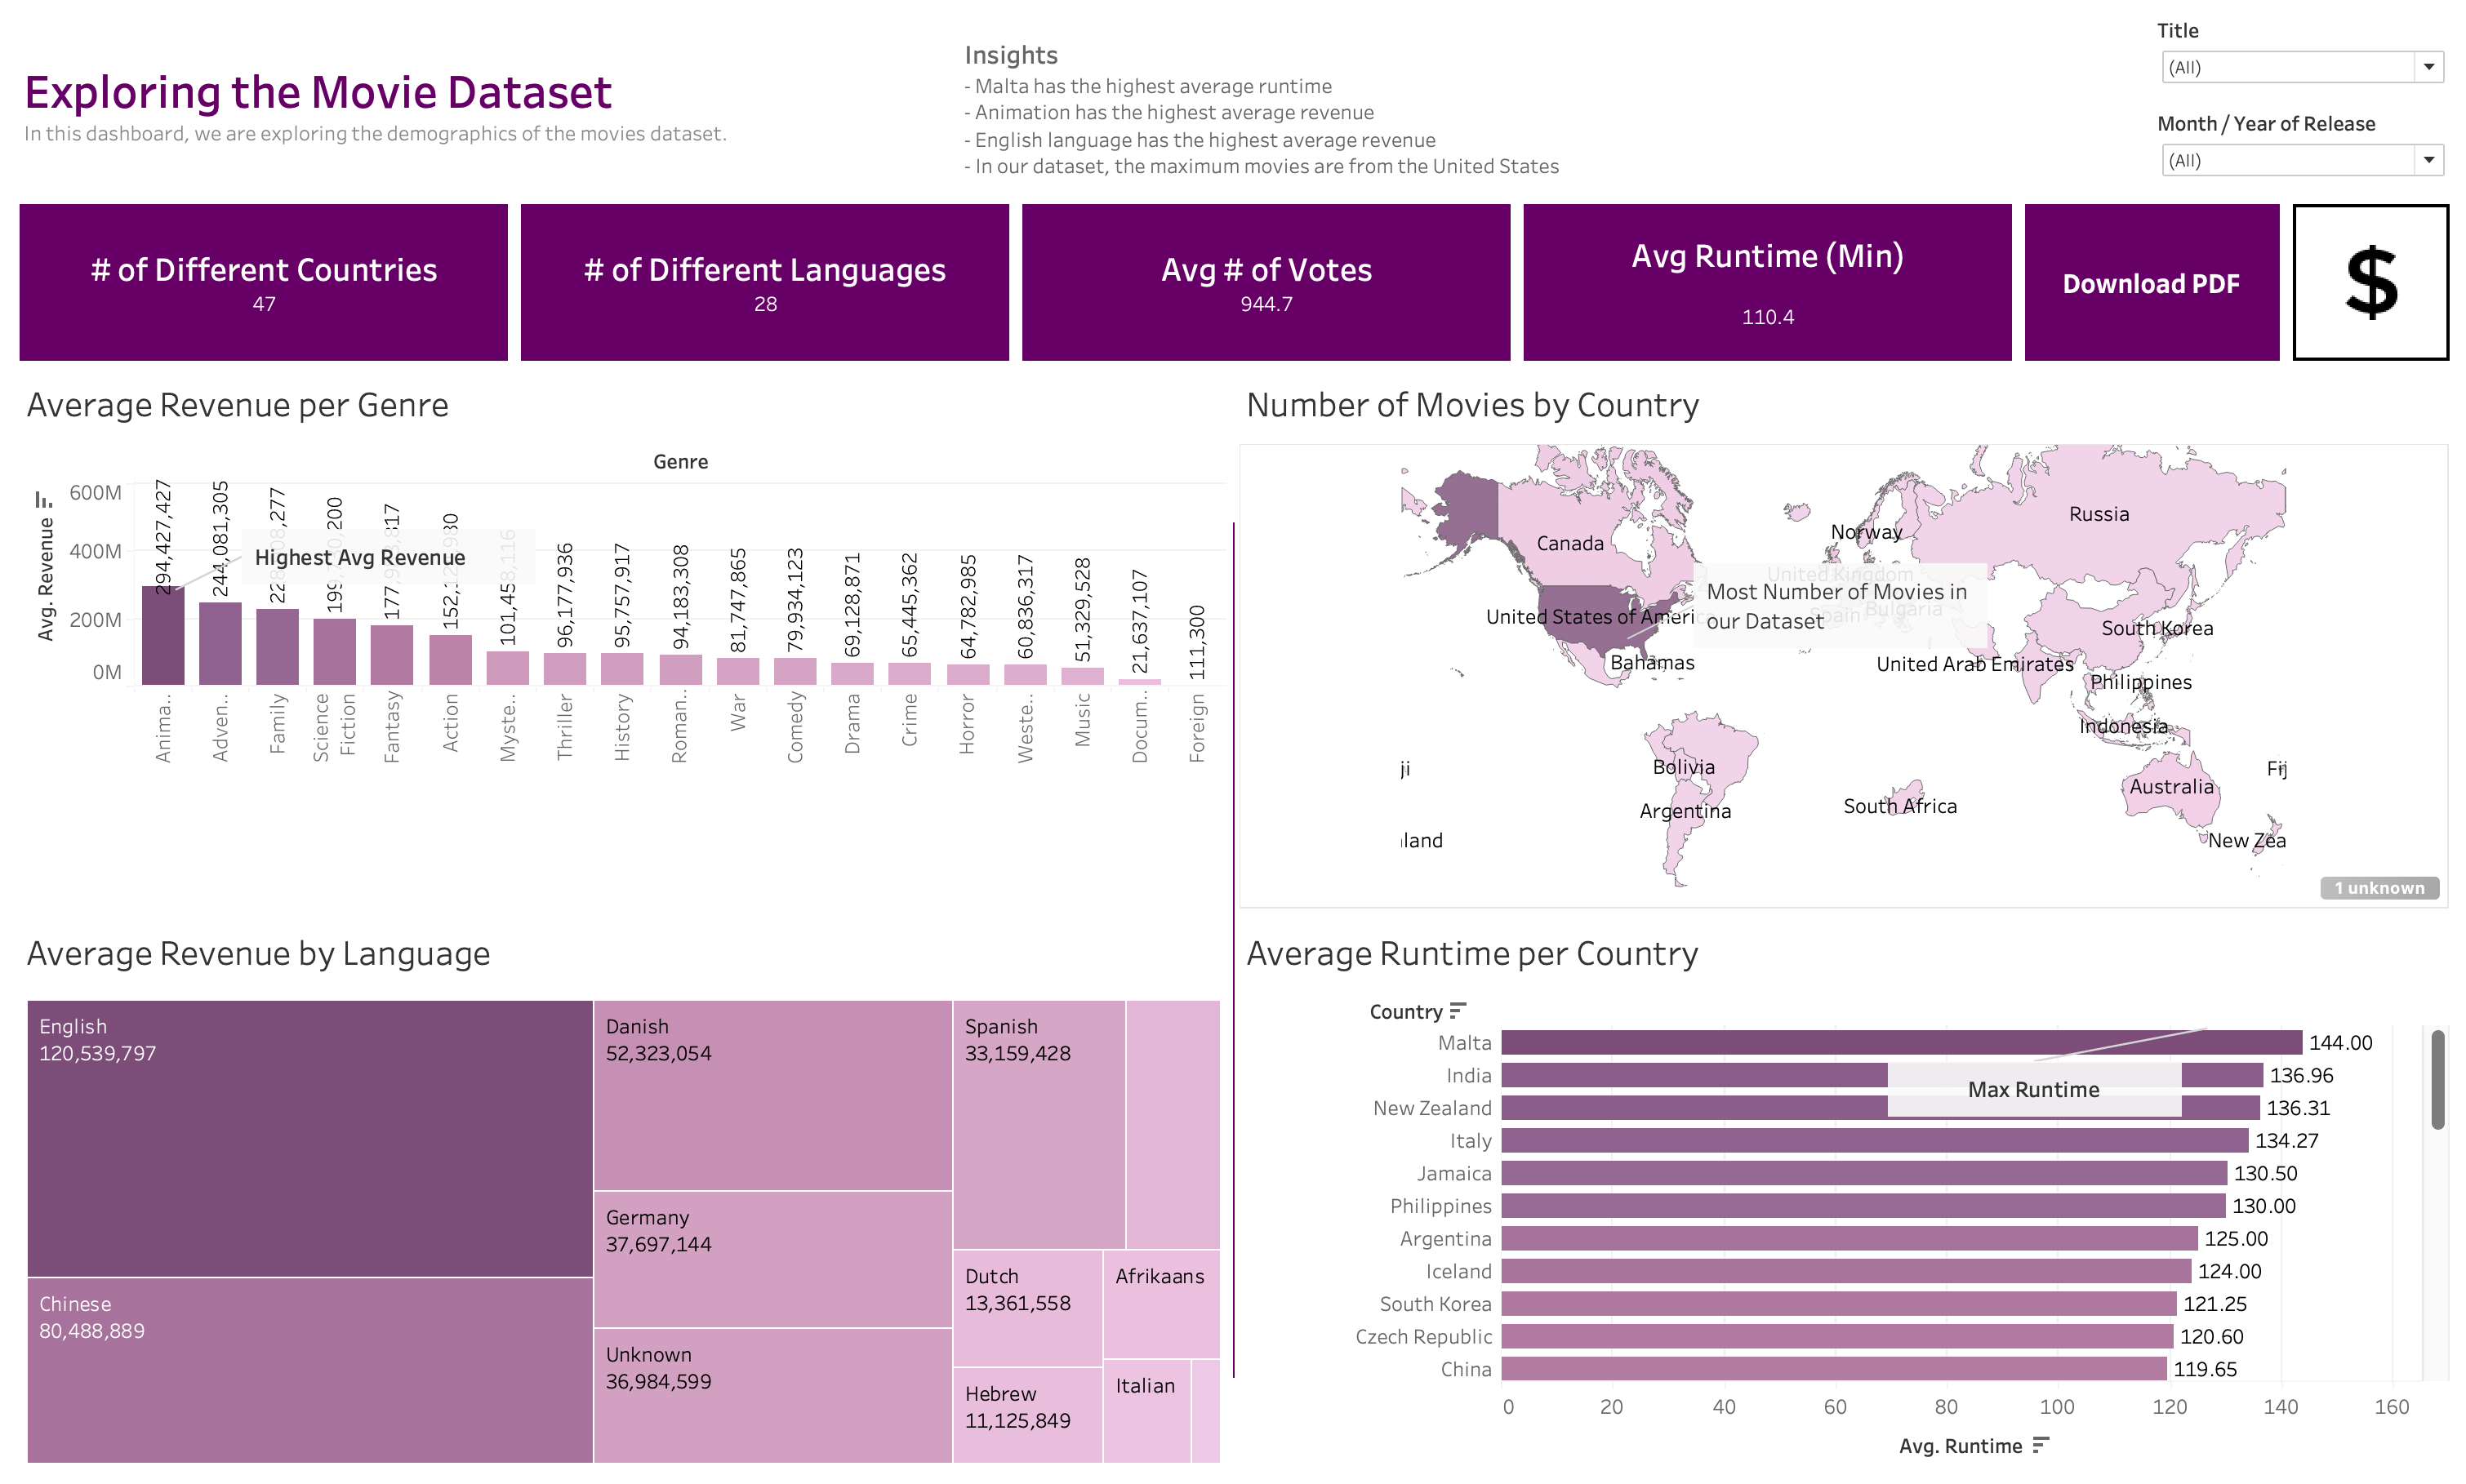

In [26]:
with open("Screenshot 2024-12-03 at 9.26.28 PM.png", "rb") as file:
    encoded_image = file.read()

# Display the embedded image
display(Image(data=encoded_image, format='jpg'))

Dashboard 1 Link : https://public.tableau.com/app/profile/divyam.rana5237/viz/ExploringtheMovieDataset/MovieDashboard?publish=yes

Dashboard 2 Link : https://public.tableau.com/app/profile/divyam.rana5237/viz/ExploringtheData/RevenueDashboard?publish=yes

# Data Cleaning and Preparation

In [16]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.imdb_title_basics` as(
    SELECT * 
    FROM `fall24-ba775-b07.data.imdb_title_basics`
    WHERE startYear != '\\N'
)

Query is running:   0%|          |

""


In [18]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_titles_basics` AS (
    SELECT tconst,titleType, genres, startYear, endYear, runtimeMinutes, primaryTitle
    FROM `fall24-ba775-b07.data.imdb_title_basics`
    WHERE endYear != '\\N' AND startYear != '\\N' AND genres IS NOT NULL AND genres <> '\\N' and runtimeMinutes <> '\\N'
);

Query is running:   0%|          |

""


In [19]:
%%bigquery 
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_imdb_5000_movies` AS (
    SELECT genres, original_language, original_title, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, title, vote_average, vote_count
    FROM `fall24-ba775-b07.data.imdb_5000_movies`
    WHERE genres IS NOT NULL AND revenue != 0 AND runtime != 0
);

Query is running:   0%|          |

""


In [20]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_imdb_title_ratings` AS (
    SELECT tconst,averageRating,numVotes
    FROM `fall24-ba775-b07.data.imdb_title_ratings`
    WHERE averageRating IS NOT NULL
      AND numVotes IS NOT NULL)

Query is running:   0%|          |

""


In [21]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_title_episode` as (
    SELECT *
    FROM `fall24-ba775-b07.data.imdb_title_episode`
    WHERE seasonNumber<>'\\N'
)

Query is running:   0%|          |

""


In [22]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_titles_with_runtime` AS
SELECT 
    tconst,
    genres,
    averageRating,
    CAST(runtimeMinutes AS INT) AS runtimeMinutes
FROM `fall24-ba775-b07.views.clean_titles_basics`
INNER JOIN `fall24-ba775-b07.data.imdb_title_ratings` USING (tconst)


Query is running:   0%|          |

""


In [24]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_titles_with_years` AS
SELECT 
    tb.tconst,
    tb.primaryTitle,
    CAST(tb.startYear AS INT64) AS startYear,
    CAST(tb.endYear AS INT64) AS endYear,
    tb.runtimeMinutes,
    tr.averageRating
FROM `fall24-ba775-b07.views.clean_titles_basics` AS tb
JOIN `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst
WHERE tb.titleType = 'tvEpisode' OR tb.titleType = 'tvSeries'


Query is running:   0%|          |

""


In [25]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_title_episodes` AS
SELECT 
    te.tconst,
    te.seasonNumber,
    tb.primaryTitle,
    tr.averageRating,
    tr.numVotes
FROM `fall24-ba775-b07.data.imdb_title_episode` AS te
JOIN `fall24-ba775-b07.data.imdb_title_basics` AS tb ON te.tconst = tb.tconst
JOIN `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst;


Query is running:   0%|          |

""


In [2]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_movies_with_language` AS
SELECT 
    m.original_title,
    m.original_language,
    CASE
        WHEN m.original_language = 'de' THEN 'Germany'
        WHEN m.original_language = 'id' THEN 'Indonesian'
        WHEN m.original_language = 'he' THEN 'Hebrew'
        WHEN m.original_language = 'zh' THEN 'Chinese'
        WHEN m.original_language = 'it' THEN 'Italian'
        WHEN m.original_language = 'nl' THEN 'Dutch'
        WHEN m.original_language = 'da' THEN 'Danish'
        WHEN m.original_language = 'es' THEN 'Spanish'
        WHEN m.original_language = 'pt' THEN 'Portuguese'
        WHEN m.original_language = 'af' THEN 'Afrikaans'
        WHEN m.original_language = 'en' THEN 'English'
        ELSE 'Others' 
    END AS language_name
FROM 
    fall24-ba775-b07.views.clean_imdb_5000_movies AS m


Query is running:   0%|          |

""


In [27]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.clean_movies_with_ratings` AS
SELECT 
    tb.tconst,
    tb.primaryTitle,
    tr.averageRating,
    tr.numVotes
FROM 
    `fall24-ba775-b07.data.imdb_title_basics` AS tb
JOIN 
    `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst
WHERE 
    tb.titleType = 'movie' AND tr.numVotes > 10000;


Query is running:   0%|          |

""


In [28]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.classified_movies_revenue` AS
SELECT 
    *,
    CASE 
        WHEN revenue >= 140165095.5 THEN 'High Revenue'
        WHEN revenue <= 15352895.25 THEN 'Low Revenue'
        ELSE 'Medium Revenue'
    END AS revenue_range
FROM 
    `fall24-ba775-b07.data.imdb_5000_movies`
WHERE 
    revenue IS NOT NULL;


Query is running:   0%|          |

""


In [29]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.movies_with_decade_rating` AS
SELECT 
    CAST(FLOOR(CAST(tb.startYear AS INT64) / 10) * 10 AS INT64) AS decade,
    tr.averageRating
FROM 
    `fall24-ba775-b07.views.imdb_title_basics` AS tb
JOIN 
    `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst
WHERE 
    tb.titleType = 'movie';


Query is running:   0%|          |

""


In [30]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.classified_movies_runtime` AS
SELECT 
    *,
    CASE 
        WHEN runtime >= 120 THEN 'Long (> 2 hours)'
        WHEN runtime BETWEEN 90 AND 119 THEN 'Normal (1.5 - 2 hours)'
        WHEN runtime BETWEEN 60 AND 89 THEN 'Short (1 - 1.5 hours)'
        ELSE 'Very Short (< 1 hour)'
    END AS runtime_range
FROM 
    `fall24-ba775-b07.data.imdb_5000_movies`
WHERE 
    runtime IS NOT NULL;


Query is running:   0%|          |

""


In [31]:
%%bigquery
CREATE OR REPLACE VIEW `fall24-ba775-b07.views.movies_from_2000s` AS
SELECT 
    basics_table.primaryTitle AS movie_title,
    CAST(basics_table.startYear AS INT64) AS release_year,
    ratings_table.numVotes AS vote_count
FROM 
    `fall24-ba775-b07.data.imdb_title_ratings` AS ratings_table
JOIN 
    `fall24-ba775-b07.data.imdb_title_basics` AS basics_table 
ON 
    ratings_table.tconst = basics_table.tconst
WHERE 
    basics_table.titleType = 'movie'
    AND SAFE_CAST(basics_table.startYear AS INT64) BETWEEN 2000 AND 2009;


Query is running:   0%|          |

""


**Data Cleaning Summary**

The data cleaning process focused on ensuring data quality and consistency across the different datasets we use. Records with missing or invalid values in key fields such as startYear, endYear, genres, runtimeMinutes, and seasonNumber were removed. Essential datasets like title basics, ratings, and episodes were merged to enrich the data, while numeric fields such as runtimeMinutes, startYear, and endYear were converted to appropriate formats for reliability. Additionally, original_language codes were mapped to readable language names to enhance interpretability. These steps addressed the fundamental issues in our dataset.

To enable better analysis, we categorized and segmented the data. Movies were classified into runtime and revenue thresholds, while records were grouped by release decades to identify trends over time. Filters were applied to include only relevant data, such as movies with over 10,000 votes and episodes with valid ratings. These data cleaning steps ensure that our dataset is well-structured and ready to generate insights. 

# EDA


Lets explore the types of title's we have in our dataset

In [2]:
%%bigquery
SELECT DISTINCT titleType
FROM `fall24-ba775-b07.data.imdb_title_basics`

Query is running:   0%|          |

Downloading:   0%|          |

,titleType
0,video
1,tvShort
2,tvEpisode
3,movie
4,tvSeries
5,tvMovie
6,tvMiniSeries
7,videoGame
8,tvSpecial
9,short


We notice that there 11 types namely - video, tvShort, tvEpisode, movie, tvSeries, tvMovie, tvMiniSeries, videoGame, tvSpecial, short, tvPilot

Let's look at the most common movie genres in the dataset. We have sorted them in descending order and we can see Comedy, Documentary, Drama in the top three according to our dataset.

In [3]:
%%bigquery
SELECT 
    genres, 
    COUNT(1) as Count 
FROM fall24-ba775-b07.views.clean_titles_basics
GROUP BY 1
ORDER BY 2 DESC
Limit 5

Query is running:   0%|          |

Downloading:   0%|          |

,genres,Count
0,Comedy,6774
1,Documentary,6465
2,Drama,5792
3,Talk-Show,2354
4,Reality-TV,1814


The result shows the distribution of movie genres within the dataset. It reveals that comedy, documentary, and drama are the most popular genres. Additionally, genre combinations, such as "Drama, Romance" and "Comedy, Drama," are also common, which may reflect an audience preference for diverse content.

Now let's look at the most common average ratings in the dataset

The dataset reveals that movie ratings are heavily concentrated in the 6.8 to 8.0 range, with 7.2 being the most frequent rating, appearing in 56,447 movies. Other common ratings include 7.4, 7.6, and 7.8, reflecting a trend where the majority of movies achieve mid-to-high ratings.
This suggests that audiences and critics generally perceive most movies as "above average" to "good," indicating that achieving ratings in this range is a benchmark for market competitiveness. Production and marketing teams should aim for factors that drive ratings above 7.0 to improve appeal and align with audience expectations.

In [4]:
%%bigquery
SELECT 
    averageRating, 
    COUNT(*) as Num_Titles
FROM fall24-ba775-b07.data.imdb_title_ratings
GROUP BY 1
ORDER BY 2 DESC
Limit 5

Query is running:   0%|          |

Downloading:   0%|          |

,averageRating,Num_Titles
0,7.2,56447
1,7.4,53763
2,7.6,53588
3,7.8,52048
4,7.0,51312


Now lets look at the mean, min, max, standard deviation of the number of votes according to our dataset. We observed an average of 1,029 votes, with a minimum of 5 votes and a maximum of 2,957,891 votes. The standard deviation is 17,759. Moving forward, we plan to use this mean value as a filter to ensure the validity of our findings.

In [49]:
%%bigquery
SELECT 
    ROUND(AVG(numVotes)) as mean, 
    ROUND(MIN(numVotes)) as min, 
    ROUND(MAX(numVotes)) as max, 
    ROUND(STDDEV(numVotes)) AS standard_deviation
FROM `fall24-ba775-b07.data.imdb_title_ratings` 

Query is running:   0%|          |

Downloading:   0%|          |

,mean,min,max,standard_deviation
0,1029.0,5.0,2957891.0,17759.0


Let's look at the average, count, min rating and the max rating for our dataset. We notice the average rating to be 6.956 with count to be 1494604 and min and max rating being 1 and 10 respectively. 

In [50]:
%%bigquery
SELECT 
    COUNT(averageRating) AS count,
    AVG(averageRating) AS avg_rating,
    MIN(averageRating) AS min_rating,
    MAX(averageRating) AS max_rating
FROM `fall24-ba775-b07.views.clean_imdb_title_ratings`

Query is running:   0%|          |

Downloading:   0%|          |

,count,avg_rating,min_rating,max_rating
0,1494604,6.95666,1.0,10.0


Now let's explore the titles with high number of votes and ratings. Taking into account the previous findings of 1029 votes to be the mean and 6.96 to be the average rating, we notice that there are 50303 movies satisfying that criteria.

In [51]:
%%bigquery 
SELECT 
    COUNT(*) AS high_rating_high_votes_movies
FROM `fall24-ba775-b07.data.imdb_title_ratings`
WHERE averageRating > 6.96 AND numVotes > 1029

Query is running:   0%|          |

Downloading:   0%|          |

,high_rating_high_votes_movies
0,50303


Now let's explore the distinct langauges in our dataset. We can notice that there are 28 Distinct Languages in our movies dataset

In [52]:
%%bigquery
SELECT COUNT(DISTINCT original_language) as Number_Languages
FROM views.clean_imdb_5000_movies;

Query is running:   0%|          |

Downloading:   0%|          |

,Number_Languages
0,28


Here we are trying to find the 3 quantiles for the revenue, according to our dataset. We can see 25th percentile is 15352895.25 with the median being 51751835.0 and 75th percentile being 140165095.5

In [53]:
%%bigquery
SELECT 
    PERCENTILE_CONT(revenue, 0.25) OVER() AS Revenue_25th_Percentile,
    PERCENTILE_CONT(revenue, 0.50) OVER() AS Revenue_50th_Percentile,
    PERCENTILE_CONT(revenue, 0.75) OVER() AS Revenue_75th_Percentile
FROM 
    `fall24-ba775-b07.data.imdb_5000_movies`
WHERE revenue <> 0
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,Revenue_25th_Percentile,Revenue_50th_Percentile,Revenue_75th_Percentile
0,15352895.25,51751835.0,140165095.5


## Genres

**Which Genres have the highest ratings?**

An analysis of genre combinations provides valuable insights into audience preferences and performance trends. Notably, Documentary, Mystery, Sci-Fi emerges as a standout with an impressive Average Rating of 9.5 and a Bayesian Average Rating of 8.20, indicating strong audience approval despite being represented by only one title. This suggests that niche or unique genre combinations can achieve exceptional ratings when executed well, providing an opportunity for targeted investments in similar projects.

Similarly, Comedy, Music, Short ranks high with an Average Rating of 9.15 and a Bayesian Average Rating of 8.40, based on two titles. While this genre combination has a limited presence, its strong performance highlights its potential to captivate audiences. Stakeholders may explore producing more content within such high-performing genres, leveraging their appeal to niche yet engaged audience segments.

By examining these metrics, stakeholders can identify underrepresented but high-performing genres and align production and marketing strategies to cater to these audience preferences effectively.

In [6]:
%%bigquery
WITH count_titles_genre AS (
    SELECT 
        genres, 
        COUNT(DISTINCT b.tconst) AS Num_Titles, 
        AVG(t.averageRating) AS Average_Rating
    FROM `fall24-ba775-b07.views.clean_titles_basics` b
    INNER JOIN `fall24-ba775-b07.data.imdb_title_ratings` t 
    USING (tconst)
    GROUP BY 1
),

bayesian_adjusted_ratings AS (
    SELECT 
        genres, 
        Num_Titles, 
        Average_Rating, 
        ROUND(((Num_Titles * Average_Rating) + (MIN(Num_Titles) OVER () * AVG(Average_Rating) OVER ())) / (Num_Titles + MIN(Num_Titles) OVER ()), 2) AS Bayesian_Avg_Rating
    FROM count_titles_genre
),

ranked_genres AS (
    SELECT 
        genres, 
        Num_Titles, 
        Average_Rating, 
        Bayesian_Avg_Rating,
        RANK() OVER (ORDER BY Bayesian_Avg_Rating DESC) AS Rank
    FROM bayesian_adjusted_ratings
)

SELECT 
    genres, 
    Num_Titles, 
    Average_Rating, 
    Bayesian_Avg_Rating, 
    Rank
FROM ranked_genres
WHERE Rank <= 10
ORDER BY Rank
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,genres,Num_Titles,Average_Rating,Bayesian_Avg_Rating,Rank
0,"Comedy,Music,Short",2,9.150,8.40,1
1,"Adventure,Family,Reality-TV",4,8.575,8.24,2
2,"Documentary,Mystery,Sci-Fi",1,9.500,8.20,3
3,"Animation,Comedy,Talk-Show",2,8.800,8.16,4
4,"Documentary,Family,Reality-TV",4,8.425,8.12,5


**What is the average runtime for genres?**

The genre combination Comedy, Crime, Drama has the highest average runtime, making it a dominant choice for longer-format storytelling. However, despite its runtime, its average rating is lower than that of Biography, History, War, which ranks second in average runtime but performs better in terms of audience ratings.

This contrast highlights that while longer runtimes can indicate in-depth storytelling, they don’t necessarily guarantee higher ratings. Biography, History, War demonstrates that audiences value engaging narratives and impactful themes, even with extended runtimes. Stakeholders can use this insight to balance storytelling depth with audience preferences, prioritizing quality content over duration to maximize satisfaction and ratings.

In [7]:
%%bigquery
SELECT genres, averageRating, ROUND(AVG(runtimeMinutes), 2) AS Average_Runtime
FROM `fall24-ba775-b07.views.clean_titles_with_runtime`
GROUP BY genres, averageRating
ORDER BY Average_Runtime DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,genres,averageRating,Average_Runtime
0,"Comedy,Crime,Drama",2.9,1442.00
1,"Biography,History,War",8.3,1290.00
2,"Documentary,News,War",4.2,1099.00
3,Family,1.9,1050.00
4,"Action,Adventure,Drama",7.8,1003.33


**Summary:** The analysis highlights top-performing genres like Documentary, Mystery, Sci-Fi and Comedy, Music, Short, which achieve high ratings despite limited representation. Comedy, Crime, Drama has the longest average runtime, but Biography, History, War outperforms it in audience ratings, showcasing the value of balancing storytelling depth with quality.
These insights help stakeholders identify successful genres and refine content strategies to align with audience preferences and maximize impact.


## Tv Shows

**What are some of the most popular title types according to the dataset?**

Among TV show categories, tvEpisode, followed by tvMiniSeries and tvSeries, emerge as the most highly rated title types according to the Bayesian Average Rating. This metric provides a more reliable assessment by accounting for the number of titles and average ratings within each category, highlighting these formats' strong audience appeal. Stakeholders can focus on developing high-quality content in these title types, leveraging their proven popularity to attract and retain viewers while maximizing audience satisfaction.

In [9]:
%%bigquery
WITH count_titles_title_type AS (
    SELECT 
        titleType as Title_Type, 
        COUNT(DISTINCT b.tconst) AS Num_Titles, 
        AVG(t.averageRating) AS Average_Rating
    FROM `fall24-ba775-b07.data.imdb_title_basics` b
    INNER JOIN `fall24-ba775-b07.data.imdb_title_ratings` t 
    USING (tconst)
    GROUP BY 1
)

SELECT 
    Title_Type, 
    Num_Titles, 
    Average_Rating, 
    ROUND(((Num_Titles * Average_Rating) + (MIN(Num_Titles) OVER () * AVG(Average_Rating) OVER ())) / (Num_Titles + MIN(Num_Titles) OVER ()), 2) AS Bayesian_Avg_Rating
FROM 
    count_titles_title_type
ORDER BY 4 DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,Title_Type,Num_Titles,Average_Rating,Bayesian_Avg_Rating
0,tvEpisode,753158,7.386163,7.38
1,tvMiniSeries,18435,7.132373,7.09
2,tvSeries,99263,6.855478,6.85
3,tvSpecial,12676,6.828558,6.82
4,short,163807,6.822635,6.82


**What are some of the most popular genres in TV Series, TV Mini Series, and TV Episode?**

To ensure the reliability of the analysis, we filtered for titles with more than the mean number of votes (1,029), removing those with lower vote counts. This reveals that the most popular genres in TV Series are War, Western, and Documentary.

The Western genre, in particular, stands out as a multimedia genre set in the American West, typically between the 1850s and the end of the 19th century. This genre's continued popularity suggests a strong audience interest in historical and adventurous narratives set in this time period. Stakeholders can consider investing in War and Western genres for TV series, as these genres show high viewer engagement. Understanding the audience’s affinity for specific genres can guide content creation and marketing strategies.








In [10]:
%%bigquery
SELECT 
    genre AS Genre, 
    AVG(tr.averageRating) AS AvgRating
FROM `fall24-ba775-b07.views.clean_titles_basics` AS tb
JOIN `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst
JOIN UNNEST(SPLIT(tb.genres, ',')) AS genre
WHERE tr.numVotes >= 1029 AND (tb.titleType = 'tvEpisode' OR tb.titleType = 'tvSeries' or tb.titleType = 'tvMiniSeries')
GROUP BY Genre
ORDER BY AvgRating DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,Genre,AvgRating
0,War,8.033333
1,Western,7.626415
2,Documentary,7.593682
3,History,7.588462
4,Sport,7.516842


**What are some of the longest-Running TV Series with High Ratings?**

We noticed that the top 10 longest standing shows have certain categories prevalent:
- News/ Interview Style: Der internationale Frühschoppen, CBS Evening News, Top of the Pops, Guiding Light 
- Game Show:Password, Programa Raul Gil	
- Cooking Show: The French Chef
- Children's Show: Crackerjack!, Cirkeline	
- TV Series: The Roy Rogers Show

The prevalence of certain genres among long-standing shows suggests that News/Interview, Game Shows, and Children’s Programming can be strong contenders for sustained viewership. Stakeholders might explore these formats when planning for long-term audience engagement and content longevity.

In [11]:

%%bigquery
WITH valid_series AS (
    SELECT
        tb.tconst AS series_id,
        tb.primaryTitle AS series_title,
        CAST(tb.startYear AS INT64) AS start_year,
        CASE 
            WHEN tb.endYear = '\\N' OR tb.endYear IS NULL THEN EXTRACT(YEAR FROM CURRENT_DATE()) 
            ELSE CAST(tb.endYear AS INT64)
        END AS end_year,
        tr.averageRating AS avg_rating
    FROM 
        `fall24-ba775-b07.views.clean_titles_basics` tb
    JOIN 
        `fall24-ba775-b07.views.clean_imdb_title_ratings` tr
    ON tb.tconst = tr.tconst
    WHERE 
        tb.titleType = 'tvSeries'
        AND tb.startYear IS NOT NULL
),

series_runtime_ratings AS (
    SELECT
        series_id,
        series_title,
        start_year,
        end_year,
        (end_year - start_year) AS total_runtime_years,
        ROUND(AVG(avg_rating), 2) AS avg_rating
    FROM valid_series
    WHERE end_year >= start_year
    GROUP BY series_id, series_title, start_year, end_year
),

ranked_series AS (
    SELECT
        series_id,
        series_title,
        start_year,
        end_year,
        total_runtime_years,
        avg_rating,
        ROW_NUMBER() OVER (ORDER BY total_runtime_years DESC, avg_rating DESC) AS row_num
    FROM series_runtime_ratings
)

SELECT
    series_title,
    start_year,
    end_year,
    total_runtime_years,
    avg_rating
FROM ranked_series
WHERE row_num <= 10
ORDER BY total_runtime_years DESC, avg_rating DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,series_title,start_year,end_year,total_runtime_years,avg_rating
0,Der internationale Frühschoppen,1953,2023,70,5.5
1,Crackerjack!,1955,2021,66,6.7
2,Password,1961,2024,63,7.3
3,The Roy Rogers Show,1951,2014,63,7.1
4,CBS Evening News,1963,2025,62,5.7


**In this dataset, are the season number listings consistent across different TV series?**


We notice that the dataset has a lot of missing data as well as some inaccurate seasons. For the series "Pokemon Snap", we see that there are a couple of missing seasons, we only have 1,4,7,8. 

In [12]:
%%bigquery
WITH season_list AS (
    SELECT 
        tb.primaryTitle, 
        COUNT(DISTINCT te.seasonNumber) AS season_count, 
        STRING_AGG(DISTINCT te.seasonNumber ORDER BY te.seasonNumber) AS season_list
    FROM `fall24-ba775-b07.views.clean_title_episode` AS te
    JOIN `fall24-ba775-b07.data.imdb_title_basics` AS tb ON te.tconst = tb.tconst
    GROUP BY tb.primaryTitle
)

SELECT * FROM season_list
WHERE season_count = 4
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,primaryTitle,season_count,season_list
0,Barbarians at the Gate,4,"1,3,4,6"
1,"2009: Day 7, Part 1",4,"1,35,37,67"
2,Digestion,4,"1,3,5,6"
3,No Witnesses,4,"1,4,5,52"
4,Brooklyn Nets vs. Sacramento Kings,4,"15,16,17,19"


**What is the top-rated season for 'Awakening' series ?**

We chose 'Awakening' series as it is the series with all 4 seasons present. We are noticing that it maintains a consistent rating of 8 across all the seasons.
This approach of selecting shows with complete season data can provide valuable insights into consistent performance trends. By analyzing other series in a similar manner, stakeholders can identify patterns in audience ratings across seasons, helping to guide decisions on content continuation, scheduling, and audience engagement strategies.

In [13]:
%%bigquery
SELECT 
    CAST(te.seasonNumber AS INT64) AS seasonNumber, 
    primaryTitle, 
    ROUND(AVG(averageRating)) AS avg_rating, 
    SUM(numVotes) AS Number_Votes
FROM `fall24-ba775-b07.views.clean_title_episodes` AS te
WHERE LOWER(primaryTitle) = 'awakening'
GROUP BY primaryTitle, seasonNumber
ORDER BY seasonNumber

Query is running:   0%|          |

Downloading:   0%|          |

,seasonNumber,primaryTitle,avg_rating,Number_Votes
0,1,Awakening,8.0,7307
1,2,Awakening,8.0,6345
2,3,Awakening,8.0,224
3,4,Awakening,8.0,3832


**Summary:** The analysis highlights popular TV genres, including War, Western, and Documentary, with Western shows showing consistent viewer interest. These genres offer opportunities for content targeting loyal, niche audiences.

Longest-standing shows like those in News/Interview Style, Game Shows, and Children's Programming demonstrate potential for sustained engagement, guiding investments in enduring content formats.

Series like 'Awakening', maintaining a consistent 8 rating across all seasons, emphasize that high-quality, steady content is key to long-term audience satisfaction. This insight suggests prioritizing quality across seasons for ongoing viewer engagement.

## Movies

**What are some of the most popular movie genres and what is their average popularity and average rating?**

The analysis reveals that Drama (7.12), Thriller (7.08), and Action (6.99) are among the highest-rated genres based on average ratings. However, despite their strong ratings, these genres do not rank the highest in terms of average popularity, suggesting that critical acclaim does not always correlate with widespread audience appeal.

This insight highlights the importance of balancing quality and popularity. While investing in highly rated genres can build a reputation for excellence, targeting more popular genres may yield broader audience engagement and commercial success.

In [14]:
%%bigquery

SELECT 
    genre_names,
    COUNT(*) AS genre_count,
    ROUND(AVG(m.popularity),2) AS avg_popularity,
    ROUND(AVG(r.averageRating),2) AS avg_rating
FROM 
    fall24-ba775-b07.views.clean_imdb_5000_movies AS m 
JOIN 
    fall24-ba775-b07.data.imdb_title_basics AS t
    ON m.original_title = t.originalTitle
JOIN 
    fall24-ba775-b07.data.imdb_title_ratings AS r 
    USING(tconst) 
,  UNNEST(ARRAY(SELECT JSON_EXTRACT_SCALAR(genre, '$.name')
        FROM UNNEST(JSON_EXTRACT_ARRAY(m.genres, '$')) AS genre
    )) AS genre_names
GROUP BY 
    genre_names
ORDER BY 
    genre_count DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,genre_names,genre_count,avg_popularity,avg_rating
0,Drama,8892,28.17,7.12
1,Thriller,7258,30.82,7.08
2,Action,5623,41.11,6.99
3,Comedy,5562,28.90,6.94
4,Adventure,3877,50.34,6.95


**What are some of the highest rated language movies?**

The analysis shows that Portuguese and Hebrew movies are relatively underrepresented in the dataset but achieve the highest average ratings. This indicates strong audience and critical appreciation for films in these languages despite their limited presence.

This presents an opportunity for stakeholders to explore and invest in high-quality content in these languages, tapping into niche markets with potential for critical acclaim and audience satisfaction.

In [15]:
%%bigquery
SELECT 
    language_name,
    AVG(r.averageRating) AS avg_rating
FROM 
    `fall24-ba775-b07.views.clean_movies_with_language` AS m
JOIN 
    fall24-ba775-b07.data.imdb_title_basics AS t
    ON m.original_title = t.originalTitle
JOIN 
    fall24-ba775-b07.data.imdb_title_ratings AS r 
    USING(tconst)
GROUP BY 
    language_name
ORDER BY 
    avg_rating DESC
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,language_name,avg_rating
0,Portuguese,8.300000
1,Hebrew,8.000000
2,Italian,7.716667
3,Indonesian,7.600000
4,Germany,7.356522


**What are the Top 10 Highest-Rated Movies?**

The analysis reveals that Telugu movies dominate the top 10 highest-rated movies, with exceptions being Adharma Kadhaigal (Tamil), Rewind (Filipino), and Gundi: Legend of Love (Bulgarian). Interestingly, no Hollywood movies feature in the top 10 according to this dataset.

This highlights the strong performance of regional cinema, particularly Telugu films, in achieving high ratings. Stakeholders could explore regional content as an emerging area of interest, diversifying investments to include non-Hollywood productions that resonate with audiences globally.

In [23]:
%%bigquery
SELECT tb.primaryTitle, tr.averageRating, tr.numVotes
FROM `fall24-ba775-b07.data.imdb_title_basics` AS tb
JOIN `fall24-ba775-b07.data.imdb_title_ratings` AS tr
ON tb.tconst = tr.tconst
WHERE tb.titleType = 'movie' AND tr.numVotes > 1029
ORDER BY tr.averageRating DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,primaryTitle,averageRating,numVotes
0,Kaveri,10.0,1033
1,C202,9.9,2022
2,Laggam,9.7,3548
3,Operation Raavan,9.7,1065
4,Narudi Brathuku Natana,9.7,1913
5,Adharma Kadhaigal,9.6,1094
6,Janaka Aithe Ganaka,9.5,2126
7,Rewind,9.5,2022
8,Ramnagar Bunny,9.5,2107
9,Janam,9.3,2030


Now lets explore the number of titles released each year.

In [18]:
%%bigquery
SELECT 
    startYear AS release_year,
    COUNT(*) AS movies_count
FROM `fall24-ba775-b07.views.clean_imdb_title_basics`
WHERE startYear < 2024
GROUP BY release_year
ORDER BY release_year
LIMIT 2

Query is running:   0%|          |

Downloading:   0%|          |

,release_year,movies_count
0,1874,1
1,1878,30


**What is the average ratings and number of movies released in the last 4 decades?**

We utilize the title basics and the title ratings tables for this analysis. We observe an overall increase in the average movie ratings over the years. Additionally, there is a steady rise in the number of movies produced, with a notable shift in the 2000s and 2010s when the number of movies doubled.

The increase in both quantity and quality of movies showcases a highly competitive and evolving landscape. Stakeholders should focus on maintaining high standards to meet audience expectations while leveraging the expanding market to explore diverse genres and innovative storytelling approaches.

In [21]:
%%bigquery
SELECT FLOOR(CAST(tb.startYear AS INT64) / 10) * 10 AS decade, ROUND(AVG(tr.averageRating),2) AS avg_rating, COUNT(*) AS number_of_movies
FROM `fall24-ba775-b07.views.imdb_title_basics` AS tb
JOIN `fall24-ba775-b07.data.imdb_title_ratings` AS tr ON tb.tconst = tr.tconst
WHERE tb.titleType = 'movie'
GROUP BY Decade
ORDER BY Decade DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,decade,avg_rating,number_of_movies
0,2020.0,6.38,46328
1,2010.0,6.24,93055
2,2000.0,6.21,47642
3,1990.0,6.03,27263
4,1980.0,5.93,26196


In [20]:
%%bigquery
SELECT *
FROM (
    SELECT 
        decade, 
        AVG(averageRating) AS avg_rating
    FROM `fall24-ba775-b07.views.movies_with_decade_rating`
    GROUP BY decade
)
PIVOT (
    AVG(avg_rating) FOR decade IN (1990 AS avg_rating_1990s, 
                                    2000 AS avg_rating_2000s, 
                                    2010 AS avg_rating_2010s, 
                                    2020 AS avg_rating_2020s)
)
ORDER BY avg_rating_1990s, avg_rating_2000s, avg_rating_2010s, avg_rating_2020s;


Query is running:   0%|          |

Downloading:   0%|          |

,avg_rating_1990s,avg_rating_2000s,avg_rating_2010s,avg_rating_2020s
0,6.029736,6.205802,6.242533,6.379049


**What is the Average Runtime of Movies?**

The analysis of movie durations reveals that the majority of films fall within the normal runtime range, which accounts for nearly three times the number of long movies. This distribution aligns with audience expectations for standard film lengths.

Focusing on producing films within the normal runtime range can cater to mainstream audience preferences. However, exploring long-format movies in niche genres or platforms may provide opportunities for differentiation and engagement with specific viewer segments.

In [27]:
%%bigquery
SELECT 
    runtime_range,
    COUNT(*) AS movie_count
FROM 
    `fall24-ba775-b07.views.classified_movies_runtime`
GROUP BY 
    runtime_range
ORDER BY 
    movie_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,runtime_range,movie_count
0,Normal (1.5 - 2 hours),3023
1,Long (> 2 hours),1073
2,Short (1 - 1.5 hours),662
3,Very Short (< 1 hour),43


**Which countries have the highest average movie runtime?**

The results show the average runtime of movies produced in different countries, categorized as "Long," "Normal," or "Short." Libya tops the list with the longest average runtime of 173 minutes, followed by Malta at 144 minutes and Kyrgyzstan at 135 minutes. On the other end, countries like Slovenia, Afghanistan, and Guadeloupe have shorter average runtimes, classified as "Short." This analysis reveals significant differences in movie lengths across countries, with certain regions tending to produce films with notably longer or shorter durations.

In [22]:
%%bigquery
SELECT 
    JSON_EXTRACT_SCALAR(production_countries, '$[0].name') AS country_name, 
    AVG(runtime) AS avg_runtime,
    runtime_range
FROM 
    `fall24-ba775-b07.views.classified_movies_runtime`
WHERE 
    production_countries IS NOT NULL
GROUP BY 
    country_name, runtime_range
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,country_name,avg_runtime,runtime_range
0,United States of America,102.597512,Normal (1.5 - 2 hours)
1,Kyrgyz Republic,135.000000,Long (> 2 hours)
2,Algeria,99.000000,Normal (1.5 - 2 hours)
3,Guadaloupe,78.000000,Short (1 - 1.5 hours)
4,Dominican Republic,101.000000,Normal (1.5 - 2 hours)


**What are the Top 10 most popular movies (by vote count) released in the 2000s**

Leading the list is The Dark Knight (2008) with nearly 2.94 million votes, followed by Breaking Bad (2008), and the Lord of the Rings trilogy, with The Fellowship of the Ring (2001), The Return of the King (2003), and The Two Towers (2002) all securing high vote counts. Other popular titles from the decade include Gladiator (2000), Inglourious Basterds (2009), Batman Begins (2005), The Prestige (2006), and The Departed (2006). These results highlight the enduring popularity of epic adventures, crime dramas, and complex narratives from the 2000s among audiences.
These results underscore the enduring popularity of epic adventures, crime dramas, and complex narratives, which continue to resonate with audiences. Stakeholders can capitalize on these genres by investing in high-quality, emotionally engaging, and narratively intricate films to attract broad and dedicated viewership.

In [28]:
%%bigquery
SELECT 
    movie_title,
    release_year,
    vote_count
FROM 
    `fall24-ba775-b07.views.movies_from_2000s`
ORDER BY 
    vote_count DESC
LIMIT 10;



Query is running:   0%|          |

Downloading:   0%|          |

,movie_title,release_year,vote_count
0,The Dark Knight,2008,2939644
1,The Lord of the Rings: The Fellowship of the Ring,2001,2054876
2,The Lord of the Rings: The Return of the King,2003,2025045
3,The Lord of the Rings: The Two Towers,2002,1825670
4,Gladiator,2000,1668967
5,Inglourious Basterds,2009,1626167
6,Batman Begins,2005,1610495
7,The Prestige,2006,1473959
8,The Departed,2006,1450779
9,Avatar,2009,1407149


**What are the top 3 highest-rated movies in  Action, Adventure, Comedy, Crime, and Drama genres?**

The chart shows a range of top-rated films across genres. In Action, "Kaveri" stands out with a perfect rating of 10.0, though with fewer votes (1,033). In Adventure, "Gandhada Gudi" has 2950 votes and a rating of 8.9. Comedy features classics like "Ramnagar Bunny," rated 9.5 with over 2107 votes. These insights suggest opportunities for stakeholders to leverage niche, high-rated films for critical acclaim and to prioritize broader-reaching titles in genres like Adventure and Comedy to maximize audience engagement and commercial success.

In [16]:
%%bigquery
WITH GenreMovies AS (
    SELECT 
        DISTINCT basics_table.primaryTitle AS movie_title, 
        basics_table.genres, 
        ratings_table.averageRating AS rating, 
        ratings_table.numVotes, 
        basics_table.tconst
    FROM `fall24-ba775-b07.data.imdb_title_ratings` AS ratings_table
    JOIN `fall24-ba775-b07.data.imdb_title_basics` AS basics_table 
    ON ratings_table.tconst = basics_table.tconst
    WHERE ratings_table.numVotes > 1029 AND basics_table.genres IS NOT NULL and titleType = 'movie'),
    
ExplodedGenres AS (
    SELECT 
        tconst, 
        movie_title, 
        rating, 
        numVotes, 
        TRIM(SPLIT(genres, ',')[OFFSET(0)]) AS genre FROM GenreMovies),
    
RankedMovies AS (
    SELECT 
        genre, 
        movie_title, 
        rating, 
        numVotes, 
        ROW_NUMBER() OVER (PARTITION BY genre ORDER BY rating DESC, numVotes DESC) AS rank 
    FROM ExplodedGenres WHERE genre IN ('Drama', 'Comedy', 'Action', 'Adventure', 'Crime'))

SELECT genre, movie_title, rating, numVotes FROM RankedMovies WHERE rank <= 3 ORDER BY genre, rating DESC


Query is running:   0%|          |

Downloading:   0%|          |

,genre,movie_title,rating,numVotes
0,Action,Kaveri,10.0,1033
1,Action,Fighting the Fire,9.3,1646
2,Action,Ramayana: The Legend of Prince Rama,9.2,15505
3,Adventure,Gandhada Gudi,8.9,2950
4,Adventure,Dipu Number 2,8.9,2629
5,Adventure,"The Good, the Bad and the Ugly",8.8,828899
6,Comedy,Ramnagar Bunny,9.5,2107
7,Comedy,The Chaos Class,9.2,43648
8,Comedy,Daaru Na Peenda Hove,9.2,2291
9,Crime,Operation Raavan,9.7,1065


**Summary:** The analysis highlights a steady increase in movie ratings over the years, with a notable doubling in movie production since the 2000s. Leading the popularity rankings are iconic films such as The Dark Knight (2008), Breaking Bad (2008), and the Lord of the Rings trilogy, which demonstrate the enduring appeal of epic adventures, crime dramas, and complex narratives. The analysis also shows that Action, Adventure, and Comedy genres dominate the ratings, reflecting a strong audience preference for these categories. Additionally, while Portuguese and Hebrew movies are relatively few in number, they achieve the highest ratings, signaling potential for niche markets. Interestingly, Telugu films outperform Hollywood in this dataset, suggesting an opportunity for stakeholders to invest in regional content and diversify their film portfolios. These insights point to the importance of focusing on high-quality, genre-diverse films, while also exploring regional cinema to meet evolving audience tastes.

## Revenue Generation - Movies


**What is the categorization of the movies according to the revenue?**

Movies are categorized based on their revenue, using the 75th percentile for high revenue, the median for medium revenue, and the 25th percentile for low revenue. The results show that the highest number of movies fall into the medium revenue category, followed by low revenue and high revenue movies, as expected.

This distribution suggests that the majority of movies generate moderate returns, with fewer achieving high revenue. Stakeholders can use this insight to identify opportunities in the mid-tier revenue space, focusing on scaling successful medium-revenue movies or finding ways to boost low-revenue films into more profitable segments. Additionally, a small but consistent number of high-revenue films indicate the importance of aiming for blockbuster potential, although these are less common.


In [26]:
%%bigquery
SELECT 
    revenue_range,
    COUNT(*) AS movie_count
FROM 
    `fall24-ba775-b07.views.classified_movies_revenue`
GROUP BY 
    revenue_range
ORDER BY 
    revenue_range DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,revenue_range,movie_count
0,Medium Revenue,1688
1,Low Revenue,2271
2,High Revenue,844


**What are the  highest revenue generating movie for each country (TOP 10)?**

The analysis reveals that Avatar generated huge revenue in both the US and UK, solidifying its status as a global blockbuster. However, an interesting observation is that Pirates of the Caribbean was the highest revenue-generating movie in the Caribbean countries of Jamaica, Bahamas, and Dominica, highlighting regional preferences for certain genres or franchises.

This underscores the importance of understanding regional market preferences when planning movie releases and marketing strategies. Stakeholders can leverage these insights to target specific regions with tailored promotional campaigns and explore content that resonates strongly within those markets. Regional blockbusters like Pirates of the Caribbean show that local cultural connections can drive significant box office performance.








In [63]:
%%bigquery

WITH CountryRevenue AS (
    SELECT
        title,
        revenue,
        JSON_EXTRACT_SCALAR(country, "$.name") AS country
    FROM fall24-ba775-b07.data.imdb_5000_movies,
    UNNEST(JSON_EXTRACT_ARRAY(production_countries)) AS country
)
SELECT
    country,
    title,
    revenue
FROM (
    SELECT
        country,
        title,
        revenue,
        ROW_NUMBER() OVER (PARTITION BY country ORDER BY revenue DESC) AS row_num
    FROM CountryRevenue
)
WHERE row_num = 1
ORDER BY revenue DESC
LIMIT 10


Query is running:   0%|          |

Downloading:   0%|          |

,country,title,revenue
0,United States of America,Avatar,2787965087
1,United Kingdom,Avatar,2787965087
2,Japan,Furious 7,1506249360
3,China,Iron Man 3,1215439994
4,New Zealand,The Lord of the Rings: The Return of the King,1118888979
5,Bahamas,Pirates of the Caribbean: Dead Man's Chest,1065659812
6,Jamaica,Pirates of the Caribbean: Dead Man's Chest,1065659812
7,Dominica,Pirates of the Caribbean: Dead Man's Chest,1065659812
8,Germany,Harry Potter and the Chamber of Secrets,876688482
9,Canada,2012,769653595


**What is the number of movies in each revenue slab?**

In this analysis, movies are categorized into revenue slabs: less than 10M, 10-50M, 50-100M, and 100M and above. The results reveal that the largest number of films fall into the less than 10M revenue slab, followed by a good number of movies in the 100M and 10-50M slabs.

This distribution highlights that while a significant portion of films earn relatively modest revenues, there is a notable segment of higher-revenue movies in the 100M and 10-50M range. Stakeholders can focus on scaling up mid-range revenue films through enhanced marketing or distribution strategies, while also continuing to identify opportunities to break into the high-revenue segment, where fewer but highly successful movies reside.

In [102]:
%%bigquery
SELECT 
    CASE 
        WHEN revenue >= 100000000 THEN '>= 100M'
        WHEN revenue BETWEEN 50000000 AND 99999999 THEN '50M - 100M'
        WHEN revenue BETWEEN 10000000 AND 49999999 THEN '10M - 50M'
        ELSE '0 - 10M'
    END AS revenue_range,
    COUNT(*) AS movie_count
FROM 
    `fall24-ba775-b07.data.imdb_5000_movies`
WHERE 
    revenue IS NOT NULL
GROUP BY 
    revenue_range
ORDER BY 
    revenue_range;


Query is running:   0%|          |

Downloading:   0%|          |

,revenue_range,movie_count
0,0 - 10M,2063
1,10M - 50M,1022
2,50M - 100M,587
3,>= 100M,1131


**Which are some of the highest money making production houses, according to revenue slabs?**

The top 5 production companies by average revenue are led by Patalex IV Productions Limited, with an impressive 895.92 million dollars per movie, followed by Marvel Studios at 730.18 million dollars. All the listed companies fall into the "High Revenue" category, each consistently generating over $100 million per movie on average.

These insights emphasize the dominance of top-tier production companies in generating significant revenue per film. Stakeholders should consider the strategies and resources that these high-performing companies use to drive profitability, including investing in high-budget franchises and popular content, as well as leveraging established fanbases. Collaborations or acquisitions of successful companies could also be a potential strategy for expanding into the high-revenue segment.

In [103]:
%%bigquery
SELECT 
    JSON_EXTRACT_SCALAR(production_companies, '$[0].name') AS main_production_company,
    FORMAT("%.2f", AVG(revenue) / 1000000) AS avg_revenue_million,
    CASE
        WHEN AVG(revenue) >= 100000000 THEN '>= 100M'
        WHEN AVG(revenue) BETWEEN 50000000 AND 99999999 THEN '50M - 100M'
        WHEN AVG(revenue) BETWEEN 10000000 AND 49999999 THEN '10M - 50M'
        ELSE '0 - 10M'
    END AS avg_revenue_range,
    CASE
        WHEN AVG(revenue) >= 100000000 THEN 'High Revenue'
        WHEN AVG(revenue) >= 50000000 THEN 'Medium Revenue'
        ELSE 'Low Revenue'
    END AS revenue_category
FROM `fall24-ba775-b07.data.imdb_5000_movies`
WHERE 
    revenue IS NOT NULL
GROUP BY 
    main_production_company
ORDER BY 
    AVG(revenue) DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,main_production_company,avg_revenue_million,avg_revenue_range,revenue_category
0,Patalex IV Productions Limited,895.92,>= 100M,High Revenue
1,Marvel Studios,730.18,>= 100M,High Revenue
2,1492 Pictures,704.39,>= 100M,High Revenue
3,WingNut Films,670.95,>= 100M,High Revenue
4,Pixar Animation Studios,636.59,>= 100M,High Revenue


**What are some of the most common release months for high grossing movies?**

The analysis of the movie release months reveals that June is the most common month for high-grossing movie releases, followed by December. Specifically, 133 high-grossing movies were released in June, with 127 in December. Other popular months for releases include May (102 releases) and November (96 releases). In contrast, January has the fewest high-grossing releases, with only 17 movies.

This pattern highlights that studios tend to release big-budget films during the summer months (such as June) and around the holiday season (December), likely to capitalize on increased audience availability and spending during these periods. Stakeholders should consider aligning their film release schedules with these high-demand months to maximize revenue and audience engagement.

In [110]:
%%bigquery
SELECT 
    FORMAT_DATE('%b', DATE(release_date)) AS release_month_name,
    COUNT(*) AS high_grossing_movie_count
FROM 
    `fall24-ba775-b07.data.imdb_5000_movies`
WHERE revenue >= 140165095.5
GROUP BY 
    release_month_name
ORDER BY 
    high_grossing_movie_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,release_month_name,high_grossing_movie_count
0,Jun,133
1,Dec,127
2,May,102
3,Nov,96
4,Jul,95
5,Mar,58
6,Oct,49
7,Aug,45
8,Sep,45
9,Feb,40


**Summary:**
The analysis of movie release months reveals a clear pattern in the distribution of high-grossing films. June emerges as the most popular month for movie releases, with 133 high-grossing films, followed by December with 127 releases. May and November also prove to be key months, with 102 and 96 releases, respectively. In contrast, January sees the fewest high-grossing films, with only 17 releases. This trend suggests that film studios strategically release big-budget movies during the summer months, like June, and around the holiday season in December, likely to capitalize on the increased audience availability and spending during these times. Stakeholders can use these insights to align movie releases with peak periods to maximize revenue and reach.

# Conclusion

**Insights:** This analysis reveals several key insights about audience preferences and genre success. Comedy, Drama, and Documentary are the most frequently produced genres, while Action, Adventure, and Animation stand out in terms of higher ratings, suggesting that these genres generate more engagement and satisfaction among viewers. Audience ratings predominantly fall within the range of 6.8–8.0, indicating that while most movies perform at a mid-to-high level of satisfaction, there is still room for improvement in overall content quality. Regarding release timing, June and December are the peak months for high-grossing movie releases, demonstrating that studios strategically launch big-budget films during the summer and holiday seasons to maximize reach and profitability.

Additionally, Telugu films have emerged as a significant player in the global movie landscape, particularly in terms of high ratings, highlighting the influence of regional cinema. Iconic movies like The Shawshank Redemption and The Dark Knight continue to maintain global popularity, underscoring the enduring appeal of timeless and well-crafted films that resonate with audiences long after their release. These insights point to an evolving industry where genre, timing, and regional content play crucial roles in determining a film's success.

**Recommendations:** Based on these insights, there are several recommendations for stakeholders in the movie industry. First, there should be a greater focus on producing content in high-performing genres such as Action, Adventure, and Animation, which consistently receive better ratings and drive viewer engagement. Leveraging popular themes, such as War and Western, while also tailoring content to regional preferences, could further enhance engagement and profitability. Additionally, ensuring that movies fall within the preferred runtime of 1.5–2 hours can help meet audience expectations and enhance satisfaction.

For release timing, major films should be strategically scheduled for release in June and December to leverage peak viewing periods associated with the summer and holiday seasons. Moreover, movies should be tailored to meet regional preferences, particularly in markets like the Caribbean, where films such as Pirates of the Caribbean have shown significant success.

Building a strong brand and cultivating audience loyalty, as seen with major production companies like Marvel Studios and Patalex IV Productions, should also be a priority for studios looking to ensure consistent high revenue generation. Finally, paying attention to the growing influence of regional films, especially those from markets like India, could provide an opportunity to expand global reach and tap into new and emerging audiences.

**Future Steps:** Looking ahead, further exploration into the impact of streaming services on traditional movie revenue models is essential. As streaming platforms continue to reshape the entertainment industry, understanding their influence on audience behavior and revenue generation will be crucial for adapting to the changing landscape. In addition, more detailed analysis on the roles of star power, directorial influence, and budget in driving box office success can refine production strategies and ensure optimal returns on investment.

Segmentation of movie genres and sub-genres can help identify niche markets and untapped opportunities, providing a more granular understanding of audience preferences. Assessing the role of regional variations in movie preferences could help studios refine their content to better cater to diverse global audiences. Additionally, exploring the relationship between budget size and box office success can offer valuable insights into how much should be invested in a movie to achieve a good return on investment. Finally, as the dynamics of audience behavior continue to evolve across different platforms, including TV, cinema, and streaming, it will be important to adapt production and distribution strategies to align with these shifts and maximize engagement and profitability.

# Challenges

- Collaboration Limitation: The notebook used for the analysis allowed only one person to work on it at a time, which slowed down collaboration and progress, particularly when multiple team members needed to contribute or review work simultaneously.

- Missing and Inconsistent Data: The dataset contained significant amounts of missing and inconsistent data, making it difficult to clean and preprocess. This required extensive effort and time to address, especially when trying to handle missing values or conflicting data entries in SQL.

- Data Format Issues (JSON): The dataset was provided in JSON format, which made extraction and conversion to a more usable structure for analysis cumbersome. The process of extracting and organizing data from JSON was time-consuming and added complexity to the project.

- Data Cleaning in SQL: Cleaning the data in SQL proved to be complex, as it involved handling missing, inconsistent, and sometimes contradictory data entries, which slowed down the analysis process and added to the overall workload.

These challenges required strategic problem-solving and additional time for data cleaning and collaboration management.


# References



- Internet Movie Database (IMDb). (n.d.). IMDb Datasets. Retrieved from https://datasets.imdbws.com/
- Soomro, Z. H., & Musa, S. (2020). Movie Box Office Revenue Prediction. Mendeley Data. Version 2. Retrieved from https://data.mendeley.com/datasets/xv9wtc9gdk/2

# Generative AI Disclosure
In our project, our team used ChatGPT as a generative AI tool to support several aspects of our work. Specifically, we used ChatGPT for:
- Coding Assistance: ChatGPT was used to help identify potential errors in code, suggest alternative coding approaches, and ensure the functionality of our queries and data manipulation.
- Grammar Checks: ChatGPT was utilized to review and refine the language used in our project, ensuring that our explanations, summaries, and reports are clear, concise, and grammatically correct.



